# *1. Load cycling.txt*

In [1]:
import pandas as pd

# Try to read the file with automatic separator detection
df = pd.read_csv("cycling.txt", sep=None, engine="python")

print(df.head())
print()
print(df.dtypes)
print()
print(df.shape)


      all_riders  rider_class stage  points stage_class
0  Tadej Pogačar  All Rounder    X1      15        flat
1  Tadej Pogačar  All Rounder    X2     219       hills
2  Tadej Pogačar  All Rounder    X3      34        flat
3  Tadej Pogačar  All Rounder    X4     264       hills
4  Tadej Pogačar  All Rounder    X6     114       hills

all_riders     object
rider_class    object
stage          object
points          int64
stage_class    object
dtype: object

(3496, 5)


# *2. Set up factors and inspect categories*

In [3]:
# 1. Convert to categorical
df["rider_class"] = df["rider_class"].astype("category")
df["stage_class"] = df["stage_class"].astype("category")

# 2. Inspect unique categories
print("Rider classes:", df["rider_class"].cat.categories.tolist())
print("Stage classes:", df["stage_class"].cat.categories.tolist())
print()

# 3. Basic summary of points
print(df["points"].describe())


Rider classes: ['All Rounder', 'Climber', 'Sprinter', 'Unclassed']
Stage classes: ['flat', 'hills', 'mount']

count    3496.000000
mean       12.385297
std        36.285334
min         0.000000
25%         0.000000
50%         0.000000
75%         8.000000
max       304.000000
Name: points, dtype: float64


# *3. Descriptive summaries*

In [4]:
# 1. Summary of points by rider_class
desc_by_rider = df.groupby("rider_class")["points"].describe()
print("Summary of points by rider class:")
print(desc_by_rider)
print()

# 2. Summary of points by stage_class
desc_by_stage = df.groupby("stage_class")["points"].describe()
print("Summary of points by stage class:")
print(desc_by_stage)
print()

# 3. Mean points by rider_class and stage_class (for interaction insight)
mean_by_both = df.groupby(["rider_class", "stage_class"])["points"].mean().unstack()
print("Mean points by rider and stage class:")
print(mean_by_both)


Summary of points by rider class:
              count       mean        std  min  25%   50%   75%    max
rider_class                                                           
All Rounder   323.0  37.687307  63.961640  0.0  0.0  12.0  39.5  304.0
Climber       437.0  20.169336  43.447254  0.0  0.0   6.0  16.0  269.0
Sprinter      551.0  15.036298  41.832247  0.0  0.0   0.0   4.0  272.0
Unclassed    2185.0   6.419680  23.282527  0.0  0.0   0.0   2.0  260.0

Summary of points by stage class:
              count       mean        std  min  25%  50%  75%    max
stage_class                                                         
flat         1104.0  11.794384  33.219268  0.0  0.0  0.0  8.0  272.0
hills        1472.0  12.520380  36.130357  0.0  0.0  0.0  8.0  274.0
mount         920.0  12.878261  39.906588  0.0  0.0  0.0  4.0  304.0

Mean points by rider and stage class:
stage_class       flat      hills      mount
rider_class                                 
All Rounder  15.441176  35.7867

/var/folders/vp/066r59616c170g18qjff0q4w0000gn/T/ipykernel_90796/2405949433.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_by_rider = df.groupby("rider_class")["points"].describe()
/var/folders/vp/066r59616c170g18qjff0q4w0000gn/T/ipykernel_90796/2405949433.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_by_stage = df.groupby("stage_class")["points"].describe()
/var/folders/vp/066r59616c170g18qjff0q4w0000gn/T/ipykernel_90796/2405949433.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cur

# *4. Visualization*

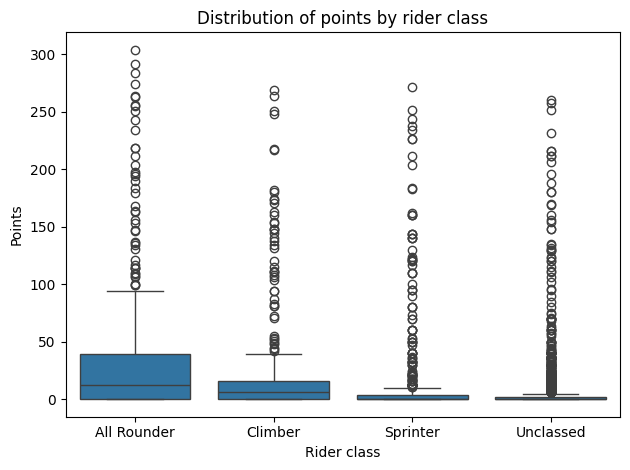

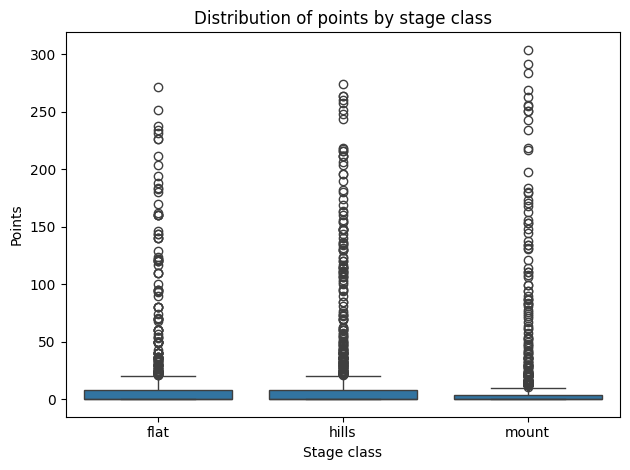

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: points by rider class
plt.figure()
sns.boxplot(data=df, x="rider_class", y="points")
plt.xlabel("Rider class")
plt.ylabel("Points")
plt.title("Distribution of points by rider class")
plt.tight_layout()
plt.savefig("box_rider_points.png", dpi=300)

# Boxplot: points by stage class
plt.figure()
sns.boxplot(data=df, x="stage_class", y="points")
plt.xlabel("Stage class")
plt.ylabel("Points")
plt.title("Distribution of points by stage class")
plt.tight_layout()
plt.savefig("box_stage_points.png", dpi=300)



# *5. Fit ANOVA (rider class × stage class)*

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-way ANOVA: points ~ rider_class * stage_class
model = ols("points ~ C(rider_class) * C(stage_class)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                     sum_sq      df          F        PR(>F)
C(rider_class)                 3.148937e+05     3.0  92.816103  8.703760e-58
C(stage_class)                 6.359253e+02     2.0   0.281162  7.549231e-01
C(rider_class):C(stage_class)  3.460646e+05     6.0  51.001926  2.041749e-60
Residual                       3.940012e+06  3484.0        NaN           NaN


# *6. Residual Diagnostics*

Shapiro-Wilk test: statistic = 0.5559984975904317 , p-value = 2.2469484861444955e-69


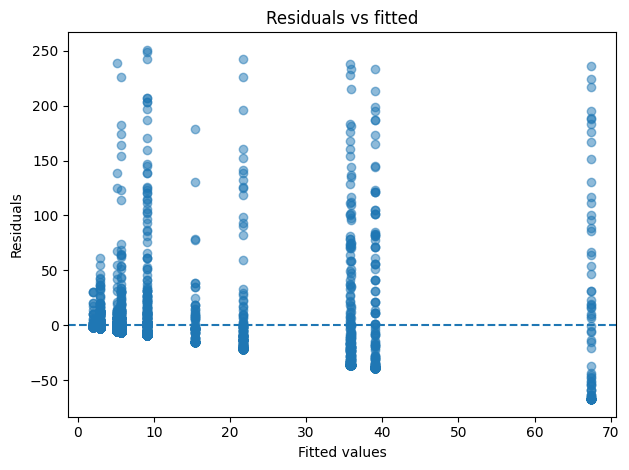

<Figure size 640x480 with 0 Axes>

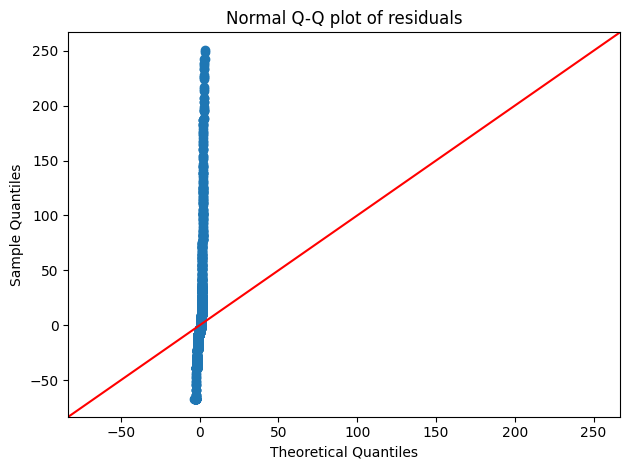

In [11]:
from scipy import stats

# Residuals and fitted values
resid = model.resid
fitted = model.fittedvalues

# 1. Residuals vs fitted
plt.figure()
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted")
plt.tight_layout()
plt.savefig("resid_vs_fitted.png", dpi=300)

# 2. Q-Q plot of residuals
plt.figure()
sm.qqplot(resid, line="45")
plt.title("Normal Q-Q plot of residuals")
plt.tight_layout()
plt.savefig("qq_resid.png", dpi=300)

# 3. Optional normality test
shapiro_stat, shapiro_p = stats.shapiro(resid)
print("Shapiro-Wilk test: statistic =", shapiro_stat, ", p-value =", shapiro_p)
